In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from scipy.signal import convolve2d
from scipy.signal import convolve
from numba import jit

In [12]:
"""
parameters here
"""
# update in time
delta_t = 0.1

# Diffusion coefficients
DA = 0.028

# grid size
N = 11

#initial condition
S = np.zeros((2*N,2*N,N))
S[2,N,0] = 1

#try weird diffusion
D_t = DA*np.ones((2*N,2*N,N))
D_t[:,:,:3] = D_t[:,:,:3]*10

# simulation steps
N_simulation_steps = 1000
"""
"""

'\n'

In [13]:
"""
def convolution_laplacian_3D(M):
    #Make a big matrix to incorporate boundary conditions
    #for this implementation, we will have periodic conditions in x and y and no flux in Z.
    #This involves literally just adding rows such that the boundary conditions are satisfied.
    #For periodic, the padded layer will be the value from the opposite side of the matrix,
    #for no flux, the padded layer (-1) equals the (1) layer such that the central difference around (0) is 0
    shp = np.shape(M)
    
    #make the padded matrix
    M_padded = np.zeros((shp[0]+2,shp[1]+2,shp[2]+2))
    
    #put the original matrix inside
    M_padded[1:-1,1:-1,1:-1] = M
    
    #pad the edges, starting with Z
    M_padded[:,:,0] = M_padded[:,:,2]
    M_padded[:,:,-1] = M_padded[:,:,-3]
    
    #pad the edges, X direction
    M_padded[0,:,:] = M_padded[-2,:,:]
    M_padded[-1,:,:] = M_padded[1,:,:]
    
    #pad the edges, Y direction
    M_padded[:,0,:] = M_padded[:,-2,:]
    M_padded[:,-1,:] = M_padded[:,1,:]
    
    """
    """
    #using the 27 point stencil
    #k = 1/26*[[[2,3,2],[3,6,3],[2,3,2]],[[3,6,3],[6,-88,6],[3,6,3]],[[2,3,2],[3,6,3],[2,3,2]]]
    
    #7 point stencil
    k = [[[0,0,0],[0,1,0],[0,0,0]],[[0,1,0],[1,-6,1],[0,1,0]],[[0,0,0],[0,1,0],[0,0,0]]]
    """
    """
    
    L = convolve(M_padded, k)
    M_upd = L[2:-2,2:-2,2:-2]
    
    #L = convolve(M_padded, k, mode='same')
    #M_upd = L[1:-1,1:-1,1:-1]
    
    return M_upd
"""

IndentationError: unexpected indent (<ipython-input-13-57150d3fbd9a>, line 29)

In [14]:
@jit
def convolution_laplacian_3D(M):
    """
    Computes the Laplacian of a 3D array using a 7-point stencil with periodic boundary conditions
    in x and y directions and no-flux boundary conditions in the z direction.

    Parameters:
        M (np.ndarray): Input 3D array.

    Returns:
        np.ndarray: The updated 3D array after applying the Laplacian.
    """
    shp = M.shape
    padded_shape = (shp[0] + 2, shp[1] + 2, shp[2] + 2)

    # Initialize the padded matrix
    M_padded = np.zeros(padded_shape, dtype=M.dtype)

    # Place the original matrix inside the padded matrix
    M_padded[1:-1, 1:-1, 1:-1] = M

    # Apply no-flux boundary conditions in the z direction
    M_padded[:, :, 0] = M_padded[:, :, 2]
    M_padded[:, :, -1] = M_padded[:, :, -3]

    # Apply periodic boundary conditions in the x direction
    M_padded[0, :, :] = M_padded[-2, :, :]
    M_padded[-1, :, :] = M_padded[1, :, :]

    # Apply periodic boundary conditions in the y direction
    M_padded[:, 0, :] = M_padded[:, -2, :]
    M_padded[:, -1, :] = M_padded[:, 1, :]

    # Create an output array for the Laplacian
    L = np.zeros_like(M, dtype=M.dtype)

    # 7-point stencil
    for i in range(1, shp[0] + 1):
        for j in range(1, shp[1] + 1):
            for k in range(1, shp[2] + 1):
                L[i - 1, j - 1, k - 1] = (
                    -6 * M_padded[i, j, k]
                    + M_padded[i + 1, j, k]
                    + M_padded[i - 1, j, k]
                    + M_padded[i, j + 1, k]
                    + M_padded[i, j - 1, k]
                    + M_padded[i, j, k + 1]
                    + M_padded[i, j, k - 1]
                )

    return L

In [15]:
def draw(M):
    """draw the concentrations"""
    fig, ax = plt.subplots(1,3,figsize=(5.65,4))
    ax[0].imshow(M[:,:,0], cmap='Greys',vmin = 0,vmax = np.amax(M))
    ax[1].imshow(M[:,N,:], cmap='Greys',vmin = 0,vmax = np.amax(M))
    ax[2].imshow(M[2,:,:], cmap='Greys',vmin = 0,vmax = np.amax(M))
    ax[0].set_title('XY')
    ax[1].set_title('XZ')
    ax[2].set_title('YZ')
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')

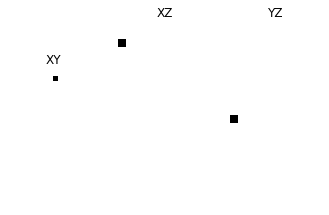

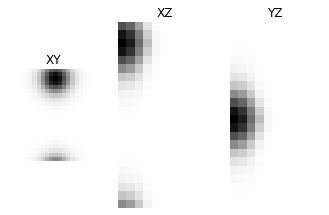

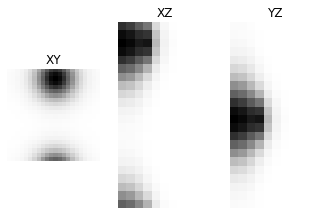

In [16]:
for t in range(N_simulation_steps):
    if t%500 == 0:
        draw(S)
        #print(np.unique(S))
    S += D_t*DA*convolution_laplacian_3D(S)
    
draw(S)

